In [83]:
#제발 되라 업데이트좀 해바ㅏㅏㅏㅏ
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob
import numpy as np

In [84]:
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings(action='ignore')
plt.rc('font', family='NanumBarunGothic') 
plt.style.use("ggplot")
pd.set_option('mode.chained_assignment',  None)

In [85]:
#데이터 가져오기
traffic_2018_01=pd.read_csv('data/2018_01분기.csv',encoding='cp949')
traffic_2018_02=pd.read_csv('data/2018_02분기.csv',encoding='cp949')
traffic_2018_03=pd.read_csv('data/2018_03분기.csv',encoding='cp949')
traffic_2018_04=pd.read_csv('data/2018_04분기.csv',encoding='cp949')
traffic_2019_01=pd.read_csv('data/2019_01분기.csv',encoding='cp949')
traffic_2019_02=pd.read_csv('data/2019_02분기.csv',encoding='cp949')
traffic_2019_03=pd.read_csv('data/2019_03분기.csv',encoding='cp949')
traffic_2019_04=pd.read_csv('data/2019_04분기.csv',encoding='cp949')
traffic_2020_01=pd.read_csv('data/2020_01분기.csv',encoding='cp949')
traffic_2020_02=pd.read_csv('data/2020_02분기.csv',encoding='cp949')
traffic_2020_03=pd.read_csv('data/2020_03분기.csv',encoding='cp949')
traffic_2020_04=pd.read_csv('data/2020_04분기.csv',encoding='cp949')
traffic_2021_01=pd.read_csv('data/2021_01분기.csv',encoding='cp949')
traffic_2021_02=pd.read_csv('data/2021_02분기.csv',encoding='cp949')

In [86]:
#2분기 데이터 합치기
traffic_data=pd.concat([traffic_2018_02,traffic_2019_02,traffic_2020_02,traffic_2021_02])
traffic_data.head()

,집계일자,영업소코드,영업소명,입출구구분코드,입출구명,TCS하이패스구분코드,TCS하이패스명,고속도로운영기관구분코드,고속도로운영기관명,영업형태구분코드,영업형태명,1종교통량,2종교통량,3종교통량,4종교통량,5종교통량,6종교통량,총교통량
0,20180401,246,가락,0,입구,1,TCS,0,한국도로공사,0,폐쇄식,193,5,7,22,29,7,263
1,20180401,246,가락,0,입구,2,hi-pass,0,한국도로공사,0,폐쇄식,542,7,15,15,144,25,748
2,20180401,29,가락(개),0,입구,1,TCS,0,한국도로공사,1,개방식,2993,19,29,28,129,347,3545
3,20180401,29,가락(개),0,입구,2,hi-pass,0,한국도로공사,1,개방식,8698,35,89,21,432,491,9766
4,20180401,29,가락(개),1,출구,1,TCS,0,한국도로공사,1,개방식,3553,19,49,31,135,422,4209


In [87]:
#2분기데이터 칼럼추가
traffic_data.index=traffic_data.집계일자
traffic_data=traffic_data.drop('집계일자',axis=1)
traffic_data=traffic_data[['영업소명','1종교통량', '2종교통량','3종교통량', '4종교통량', '5종교통량', '6종교통량', '총교통량']]
traffic_data.index=pd.to_datetime(traffic_data.index, format='%Y%m%d')
traffic_data['year']=traffic_data.index.year 
traffic_data['month']=traffic_data.index.month
traffic_data.head()

,영업소명,1종교통량,2종교통량,3종교통량,4종교통량,5종교통량,6종교통량,총교통량,year,month
집계일자,,,,,,,,,,
2018-04-01,가락,193,5,7,22,29,7,263,2018,4
2018-04-01,가락,542,7,15,15,144,25,748,2018,4
2018-04-01,가락(개),2993,19,29,28,129,347,3545,2018,4
2018-04-01,가락(개),8698,35,89,21,432,491,9766,2018,4
2018-04-01,가락(개),3553,19,49,31,135,422,4209,2018,4


In [88]:
# 2분기중 5월로만 그룹화
may_traffic_data=traffic_data[(traffic_data['month']==5)]
may_traffic_data=may_traffic_data.groupby('집계일자')['1종교통량', '2종교통량','3종교통량', '4종교통량', '5종교통량', '6종교통량', '총교통량'].sum()
may_traffic_data['year']=may_traffic_data.index.year
may_traffic_data['month']=may_traffic_data.index.month
days={0:'MON',1:'TUE',2:'WED',3:'THU',4:'FRI',5:'SAT',6:'SUN'}
may_traffic_data['day_of_week']=may_traffic_data.index.dayofweek
may_traffic_data.day_of_week=may_traffic_data.day_of_week.apply(lambda x : days[x])
may_traffic_data.head()

,1종교통량,2종교통량,3종교통량,4종교통량,5종교통량,6종교통량,총교통량,year,month,day_of_week
집계일자,,,,,,,,,,
2018-05-01,5294012,168180,249509,135681,154933,270454,6272769,2018,5,TUE
2018-05-02,5121889,224352,318528,197556,284153,303348,6449826,2018,5,WED
2018-05-03,5439564,258758,344863,233561,332666,314364,6923776,2018,5,THU
2018-05-04,6471353,262056,359577,230789,346050,355481,8025306,2018,5,FRI
2018-05-05,7583136,114075,200177,90710,152489,310046,8450633,2018,5,SAT


<AxesSubplot:title={'center':"The Korea's Traffic Trend on May"}, xlabel='month', ylabel='1종교통량'>

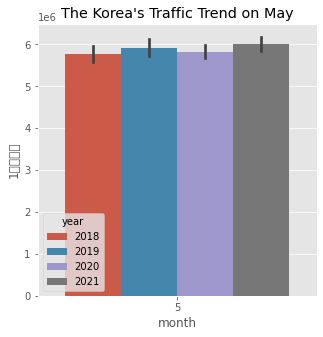

In [89]:
#2018-2021 5월 전국 교통량 분석
plt.figure(figsize=(5,5))
plt.title('The Korea\'s Traffic Trend on May')
sns.barplot(x='month', y='1종교통량',hue='year',data=may_traffic_data)

In [90]:
covid_data=pd.read_csv('data/Covid_case.csv')
covid_data.head()

,Unnamed: 0,accDefRate,accExamCnt,accExamCompCnt,careCnt,clearCnt,createDt,deathCnt,decideCnt,examCnt,resutlNegCnt,seq,stateDt,stateTime,updateDt,Unnamed: 15
0,0,2.255638,14285339.0,13229116.0,29546.0,266414.0,2021-09-25 10:49:15.225,2441.0,298401,1056223.0,12930715.0,646.0,20210925,00:00,2021-09-26 10:29:10.433,3269
1,1,2.237343,14221685.0,13191185.0,28206.0,264492.0,2021-09-24 09:53:29.116,2434.0,295132,1030500.0,12896053.0,645.0,20210924,00:00,NaN,2433
2,2,2.231558,14151069.0,13116349.0,27430.0,262842.0,2021-09-23 10:01:14.491,2427.0,292699,1034720.0,12823650.0,644.0,20210923,00:00,NaN,1716
3,3,2.218799,14112435.0,13114439.0,26752.0,261812.0,2021-09-22 09:35:53.93,2419.0,290983,997996.0,12823456.0,643.0,20210922,00:00,NaN,1720
4,4,2.205520,14081284.0,13115409.0,26760.0,260090.0,2021-09-21 09:39:49.437,2413.0,289263,965875.0,12826146.0,642.0,20210921,00:00,NaN,1729


In [91]:
# 코로나 일별 확진자 수 칼럼 추가
# 정수형 stateDt를 Datetime형 stateDt로 변환 후 인덱스로 설정

covid_data['daily_decideCnt']=covid_data.decideCnt.shift()-covid_data.decideCnt
covid_data_new=covid_data[['stateDt','daily_decideCnt']]
covid_data_new.index=pd.to_datetime(covid_data_new['stateDt'],format='%Y%m%d')
covid_data_new=covid_data_new.drop('stateDt',axis=1)
covid_data_new['year']=covid_data_new.index.year
covid_data_new['month']=covid_data_new.index.month
covid_data_new=covid_data_new[(covid_data_new['month']==5)]
covid_data_new=covid_data_new[(covid_data_new['year']==2020)]
days={0:'MON',1:'TUE',2:'WED',3:'THU',4:'FRI',5:'SAT',6:'SUN'}
covid_data_new['day_of_week']=covid_data_new.index.dayofweek
covid_data_new.day_of_week=covid_data_new.day_of_week.apply(lambda x : days[x])
covid_data_new.head()

,daily_decideCnt,year,month,day_of_week
stateDt,,,,
2020-05-31,35.0,2020,5,SUN
2020-05-30,27.0,2020,5,SAT
2020-05-29,39.0,2020,5,FRI
2020-05-28,58.0,2020,5,THU
2020-05-27,79.0,2020,5,WED


In [92]:
# 코로나 일별 확진자 수 칼럼 추가
# 정수형 stateDt를 Datetime형 stateDt로 변환 후 인덱스로 설정

covid_data['daily_decideCnt']=covid_data.decideCnt.shift()-covid_data.decideCnt
covid_data_n=covid_data[['stateDt','daily_decideCnt']]
covid_data_n.index=pd.to_datetime(covid_data_n['stateDt'],format='%Y%m%d')
covid_data_n=covid_data_n.drop('stateDt',axis=1)
covid_data_n['year']=covid_data_n.index.year
covid_data_n['month']=covid_data_n.index.month
covid_data_n=covid_data_n[(covid_data_n['month']==5)]
covid_data_n=covid_data_n[(covid_data_n['year']==2021)]
days={0:'MON',1:'TUE',2:'WED',3:'THU',4:'FRI',5:'SAT',6:'SUN'}
covid_data_n['day_of_week']=covid_data_n.index.dayofweek
covid_data_n.day_of_week=covid_data_n.day_of_week.apply(lambda x : days[x])
covid_data_n.head()

,daily_decideCnt,year,month,day_of_week
stateDt,,,,
2021-05-31,459.0,2021,5,MON
2021-05-30,430.0,2021,5,SUN
2021-05-29,480.0,2021,5,SAT
2021-05-28,533.0,2021,5,FRI
2021-05-27,587.0,2021,5,THU


<AxesSubplot:title={'center':"\nTrend Of Korea's First Class Traffic On Saturday of May(2018)\n"}, xlabel='집계일자', ylabel='1종교통량'>

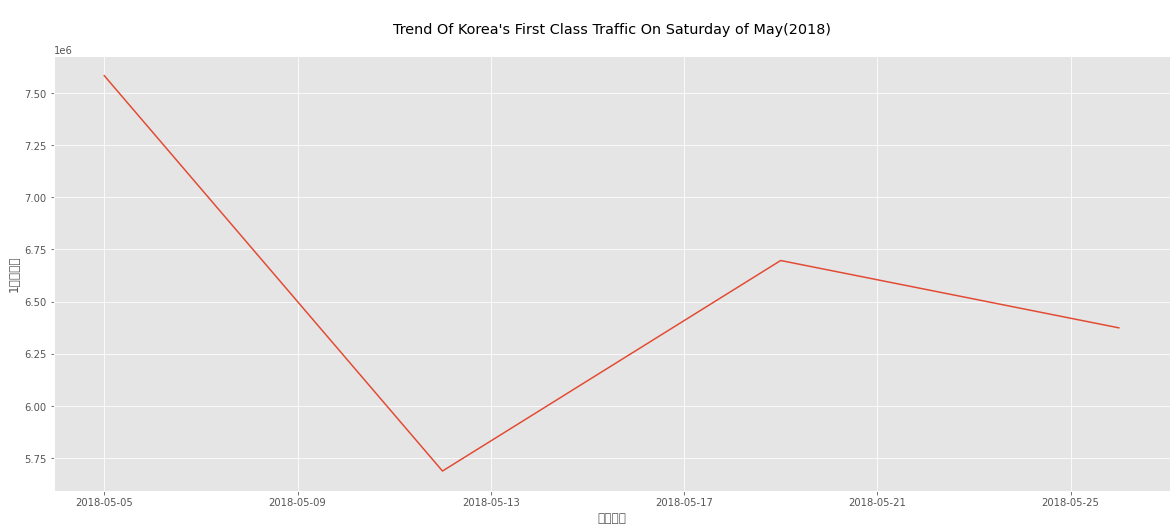

In [93]:
# 1종 교통량(대부분의 자가용) 5월 토요일 분석

plt.figure(figsize=(20,8)) 
plt.title('\nTrend Of Korea\'s First Class Traffic On Saturday of May(2018)\n')
sns.lineplot(data=may_traffic_data[(may_traffic_data.day_of_week=='SAT')&((may_traffic_data.year==2018))], x='집계일자', y='1종교통량')

<AxesSubplot:title={'center':"\nTrend Of Korea's First Class Traffic On Saturday of May(2019)\n"}, xlabel='집계일자', ylabel='1종교통량'>

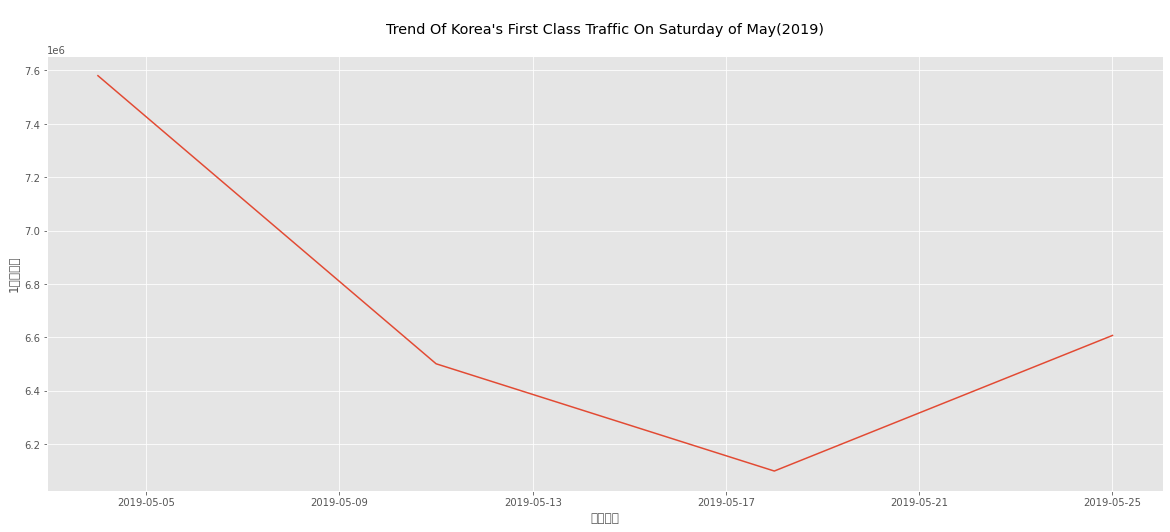

In [94]:
plt.figure(figsize=(20,8)) 
plt.title('\nTrend Of Korea\'s First Class Traffic On Saturday of May(2019)\n')
sns.lineplot(data=may_traffic_data[(may_traffic_data.day_of_week=='SAT')&((may_traffic_data.year==2019))], x='집계일자', y='1종교통량')

<AxesSubplot:title={'center':"\nTrend Of Korea's First Class Traffic On Saturday of May(2020)\n"}, xlabel='집계일자', ylabel='1종교통량'>

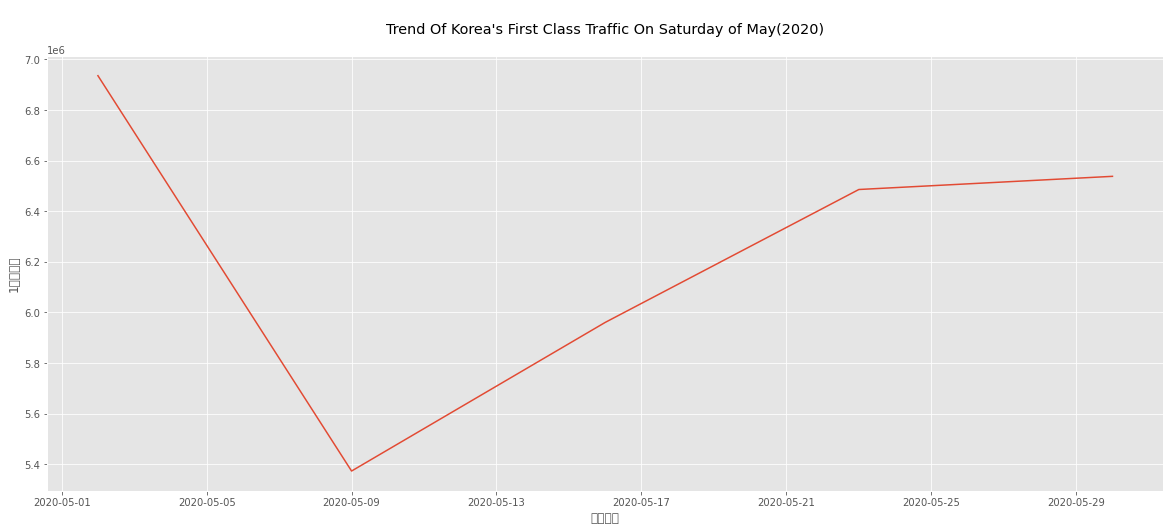

In [95]:
plt.figure(figsize=(20,8)) 
plt.title('\nTrend Of Korea\'s First Class Traffic On Saturday of May(2020)\n')
sns.lineplot(data=may_traffic_data[(may_traffic_data.day_of_week=='SAT')&((may_traffic_data.year==2020))], x='집계일자', y='1종교통량')

<AxesSubplot:title={'center':"\nTrend Of Korea's First Class Traffic On Saturday of May(2021)\n"}, xlabel='집계일자', ylabel='1종교통량'>

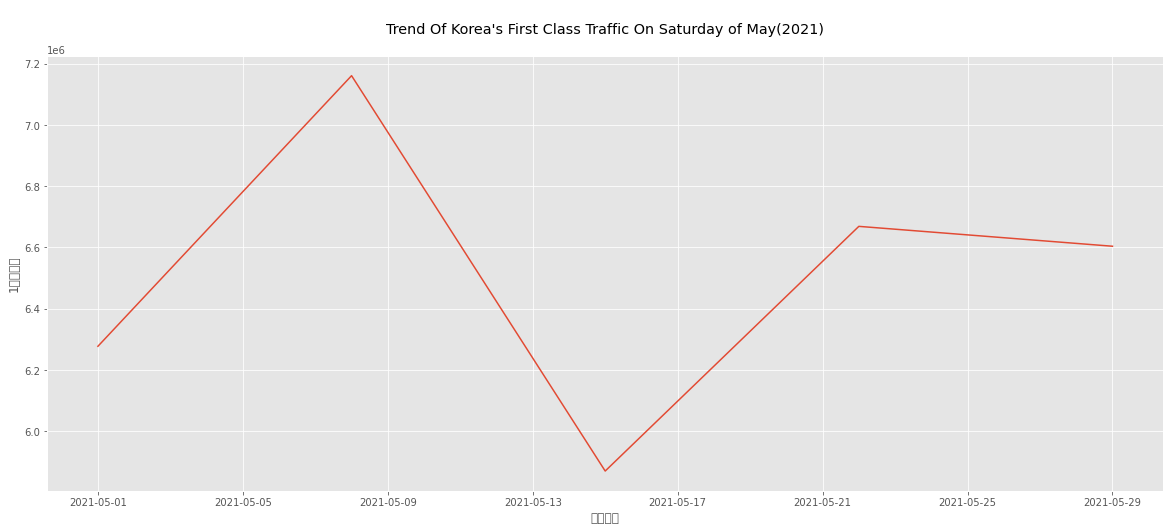

In [96]:
plt.figure(figsize=(20,8)) 
plt.title('\nTrend Of Korea\'s First Class Traffic On Saturday of May(2021)\n')
sns.lineplot(data=may_traffic_data[(may_traffic_data.day_of_week=='SAT')&((may_traffic_data.year==2021))], x='집계일자', y='1종교통량')

<AxesSubplot:title={'center':"\nTrend Of Korea's First Class Traffic On Sunday of May(2018)\n"}, xlabel='집계일자', ylabel='1종교통량'>

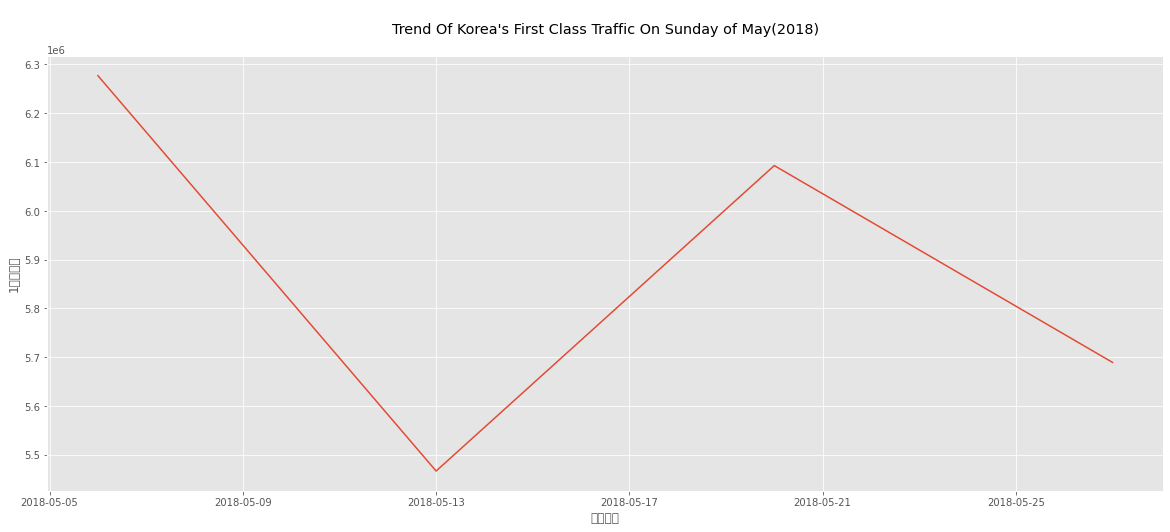

In [97]:
# 1종 교통량(대부분의 자가용) 5월 일요일 분석

plt.figure(figsize=(20,8)) 
plt.title('\nTrend Of Korea\'s First Class Traffic On Sunday of May(2018)\n')
sns.lineplot(data=may_traffic_data[(may_traffic_data.day_of_week=='SUN')&((may_traffic_data.year==2018))], x='집계일자', y='1종교통량')

<AxesSubplot:title={'center':"\nTrend Of Korea's First Class Traffic On Sunday of May(2019)\n"}, xlabel='집계일자', ylabel='1종교통량'>

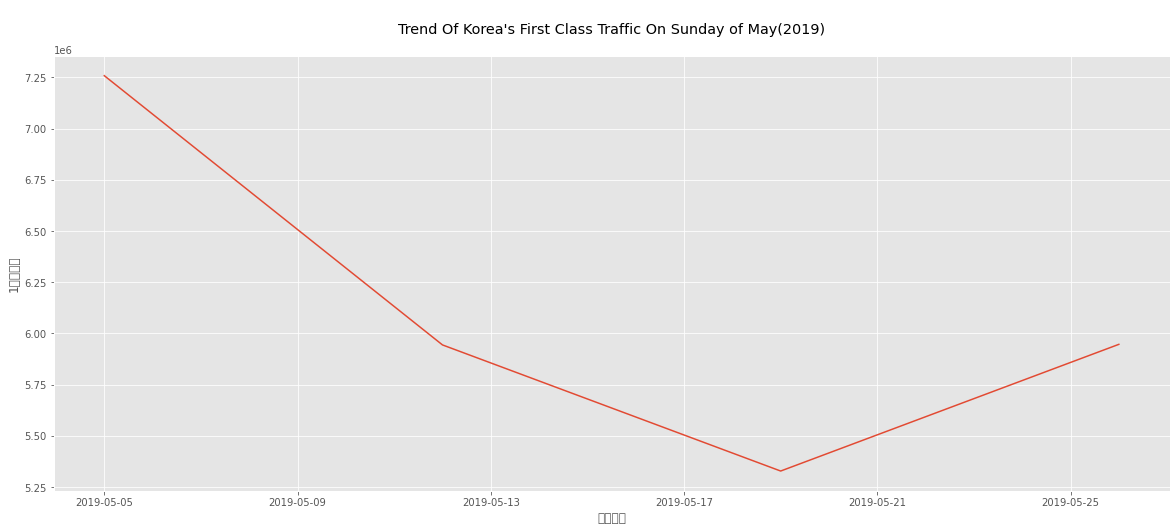

In [98]:
plt.figure(figsize=(20,8)) 
plt.title('\nTrend Of Korea\'s First Class Traffic On Sunday of May(2019)\n')
sns.lineplot(data=may_traffic_data[(may_traffic_data.day_of_week=='SUN')&((may_traffic_data.year==2019))], x='집계일자', y='1종교통량')

<AxesSubplot:title={'center':"\nTrend Of Korea's First Class Traffic On Sunday of May(2020)\n"}, xlabel='집계일자', ylabel='1종교통량'>

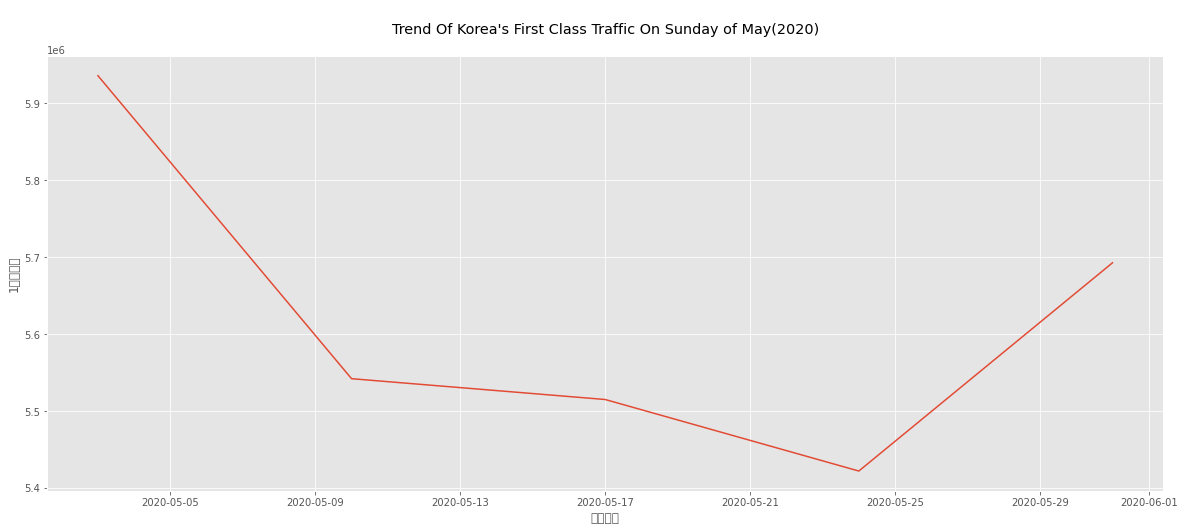

In [99]:
plt.figure(figsize=(20,8)) 
plt.title('\nTrend Of Korea\'s First Class Traffic On Sunday of May(2020)\n')
sns.lineplot(data=may_traffic_data[(may_traffic_data.day_of_week=='SUN')&((may_traffic_data.year==2020))], x='집계일자', y='1종교통량')

<AxesSubplot:title={'center':"\nTrend Of Korea's First Class Traffic On Sunday of May(2021)\n"}, xlabel='집계일자', ylabel='1종교통량'>

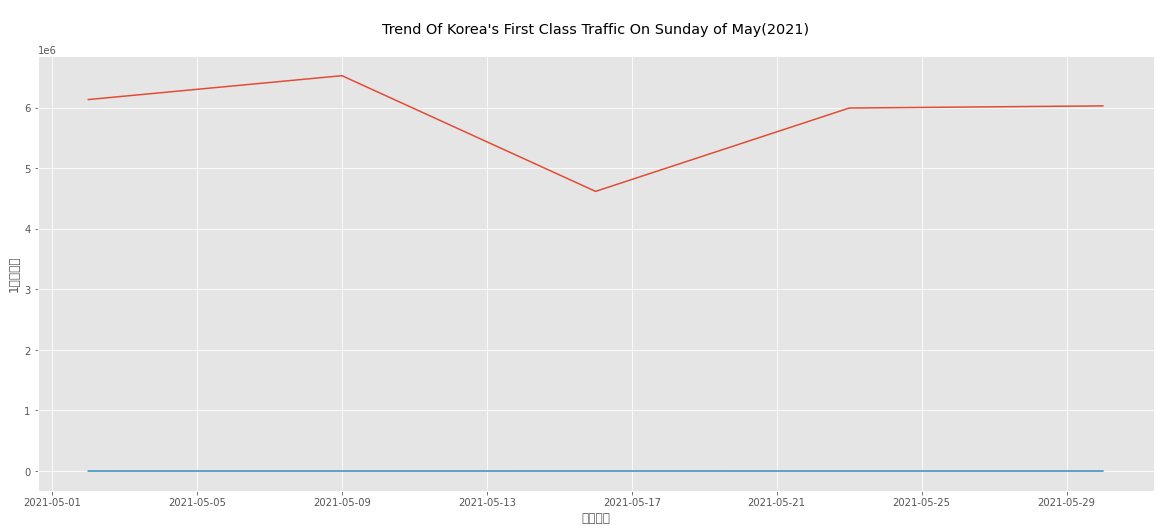

In [100]:
plt.figure(figsize=(20,8)) 
plt.title('\nTrend Of Korea\'s First Class Traffic On Sunday of May(2021)\n')
sns.lineplot(data=may_traffic_data[(may_traffic_data.day_of_week=='SUN')&((may_traffic_data.year==2021))], x='집계일자', y='1종교통량')
sns.lineplot(data=covid_data_n[(covid_data_n.day_of_week=='SUN')&((covid_data_n.year==2021))], x='stateDt', y='daily_decideCnt')